# Differential Splicing
Based on the alternative splicing events, Isotools facilitates comparisons of samples and groups of samples. 


In this tutorial, we will apply the statistical test to find differential splicing between K562 and GM12878 (on chromosome 8), and how to interpret and depict the results. 

This tutorial assumes you have run the tutorial on [transcriptome reconstruction](03_transcriptome_reconstruction.html) already, and prepared the transcriptome pkl file *"PacBio_isotools.pkl"* based on the [demonstration data set](https://nc.molgen.mpg.de/cloud/index.php/s/zYe7g6qnyxGDxRd).

In [1]:
from isotools import Transcriptome
import matplotlib.pyplot as plt
import pandas as pd

path='demonstration_dataset'
isoseq=Transcriptome.load(f'{path}/PacBio_isotools.pkl')



## Statistical test for differential splicing
Differential splicing is implemented as a likelihood ratio test, based on beta-binomial model of the observed read counts. This model takes overdispersion due to variability within the groups into account, and is therefor appropriate to compare groups of samples.

![Slide](isotools_diffsplice.png)

The test is implemented in the method [altsplice_test](../isotoolsAPI.html?highlight=altsplice_test#isotools.Transcriptome.altsplice_test).
To run the test, we need to define the groups to compare, what types of splicing events are of interest, and the coverage threshold (over all samples) required to test an event. 
The resulting table contains the test statistics, including a description of the tested region, p-value, the transcript ids supporting outcome A or B of the event, group wise PSI and overdispersion values as well as sample wise coverage information.


In [2]:
#perform the test:
types_of_interest=['ES','ME','5AS','3AS','IR'] #ignore alternative TSS/PAS for now

diff_splice=isoseq.altsplice_test(isoseq.groups(), 
                                  types=types_of_interest, 
                                  min_total=200)
diff_splice=diff_splice.sort_values('pvalue').reset_index(drop=True)
sig=diff_splice.padj<.1

n_genes=len(diff_splice.loc[sig,"gene"].unique())
print(f'{sum(sig)} differential splice sites in {n_genes} genes for '+
      " vs ".join(isoseq.groups()))
pd.set_option('display.max_columns', None)
diff_splice.head(18)
diff_splice.to_csv(f'{path}/demonstration_dataset_differential_events.csv',index = False)

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████| 10803/10803 [00:08<00:00, 1238.47genes/s]


18 differential splice sites in 16 genes for GM12878 vs K562


In [3]:
diff_splice

,gene,gene_id,chrom,strand,start,end,splice_type,novel,padj,pvalue,trA,trB,nmdA,nmdB,GM12878_PSI,GM12878_disp,K562_PSI,K562_disp,total_PSI,total_disp,GM12878_a_GM12878_in_cov,GM12878_a_GM12878_total_cov,GM12878_b_GM12878_in_cov,GM12878_b_GM12878_total_cov,GM12878_c_GM12878_in_cov,GM12878_c_GM12878_total_cov,K562_a_K562_in_cov,K562_a_K562_total_cov,K562_b_K562_in_cov,K562_b_K562_total_cov,K562_c_K562_in_cov,K562_c_K562_total_cov
0,RIPK2,ENSG00000104312.8,chr8,+,89780160,89786592,ES,True,0.000175,0.000001,"[16, 8, 26, 34, 41, 46, 32, 36, 39, 40, 42, 47...","[2, 0, 12, 9, 13, 4, 5, 10, 11, 14, 15, 17, 18...",1.0,1.0,0.994244,8.728420e-08,0.296339,1.059189e-05,0.719659,0.103622,76,76,218,220,224,225,34,104,41,153,34,111
1,ASAH1,ENSG00000104763.20,chr8,-,18067104,18067133,IR,True,0.007029,0.000135,"[11, 13, 80, 99, 69, 70, 101, 79, 81, 83, 88, ...","[12, 14, 68, 42, 44]",1.0,1.0,0.512441,1.078330e-03,0.010335,3.306517e-07,0.231512,0.069018,13,31,23,35,39,81,0,51,1,81,1,62
2,RECQL4,ENSG00000160957.15,chr8,-,144511789,144511910,5AS,False,0.007029,0.000145,"[22, 31, 6, 20, 11, 72, 13, 33, 8, 79, 2, 105,...","[114, 147, 124, 38, 143, 205, 123, 152, 197, 1...",1.0,1.0,0.012575,9.366640e-07,0.401486,1.211899e-04,0.240155,0.041071,1,150,1,9,0,1,278,666,127,301,177,482
3,SNHG6,ENSG00000245910.9,chr8,-,66922392,66922613,IR,False,0.011452,0.000409,"[1, 11, 17, 29, 16, 15, 7, 14, 19, 23, 24, 25,...","[4, 10]",1.0,1.0,0.255022,1.506108e-05,0.021488,1.779160e-06,0.128672,0.014606,5,26,13,45,21,82,1,70,3,72,1,91
4,SMIM19,ENSG00000176209.12,chr8,+,42541705,42546468,5AS,False,0.011452,0.000471,"[3, 4, 21]","[2, 5, 9, 26, 7, 17, 22, 24, 27, 28]",1.0,1.0,0.097171,1.705951e-02,0.593322,2.732809e-05,0.304097,0.074889,10,37,2,48,0,68,26,43,38,63,25,44
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
140,MRPS28,ENSG00000147586.10,chr8,-,80003180,80030053,5AS,True,1.000000,0.986636,"[5, 13, 29, 22]","[0, 4, 2, 19, 14, 21, 16, 41, 12, 47, 17, 31]",1.0,1.0,0.766587,1.523315e-05,0.776720,2.492912e-05,0.769574,0.000008,24,30,66,89,84,108,31,42,11,13,38,48
141,POLB,ENSG00000070501.12,chr8,+,42361365,42369270,ES,False,1.000000,0.994807,"[7, 11, 15, 20, 36, 40, 43]","[1, 0, 2, 12, 3, 10, 23, 24, 27, 35, 5, 9, 13,...",1.0,1.0,0.894198,1.207652e-05,0.894023,2.830737e-04,0.893994,0.000007,10,10,55,61,87,99,33,36,35,37,33,40
142,SCRIB,ENSG00000180900.20,chr8,-,143804825,143804954,5AS,False,1.000000,0.996899,"[31, 11, 94, 79, 56, 103, 142, 17, 155, 165, 4...","[5, 0, 14, 27, 36, 4, 18, 58, 6, 67, 12, 29, 3...",1.0,1.0,0.852941,NaN,0.854052,3.572960e-05,0.854019,0.000025,29,34,0,0,0,0,97,110,40,52,80,92
143,PCM1,ENSG00000078674.20,chr8,+,17993619,18006262,3AS,True,1.000000,1.000000,"[68, 15, 1, 6, 160, 31, 35, 11, 154, 253, 32, ...","[43, 237, 271, 411, 335, 242, 258, 387, 266, 2...",1.0,1.0,0.102550,1.556612e-05,0.098836,4.151420e-05,0.100326,0.000007,3,40,2,26,7,51,11,88,2,53,7,61


## Depicting differential splicing results
To visualize deferentially spliced events, isotools implements a specific plot with the function [plot_diff_results](../isotoolsAPI.html?highlight=plot_diff_results#isotools.plots.plot_diff_results), summarizing the PSI values in the two groups. For each depicted event, two distributions represent the models posterior probability of PSI values for the two groups, as well as the observed PSI values for the individual samples as points. In addition, the isoform structure and read coverage over the event can be depicted as a sashimi-plot, using the Gene methods [sashimi_plot](../isotoolsAPI.html?highlight=sashimi_plot#isotools.Gene.sashimi_plot) and [gene_track](../isotoolsAPI.html?highlight=gene_track#isotools.Gene.gene_track).

/pkg/python-3.10.8-0/lib/python3.10/site-packages/scipy/stats/_continuous_distns.py:668: RuntimeWarning: divide by zero encountered in _beta_pdf
  return _boost._beta_pdf(x, a, b)


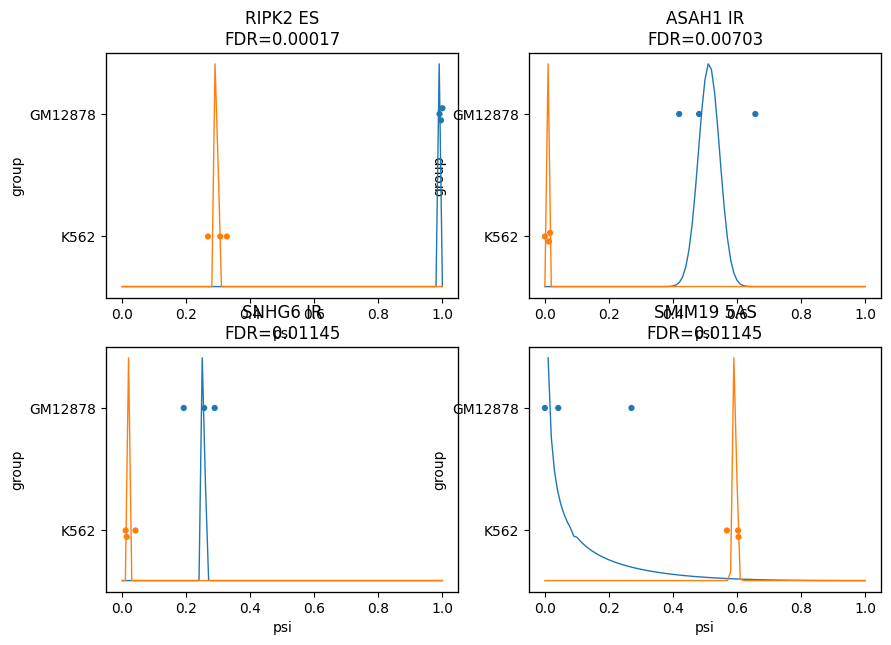

In [4]:
plt.rcParams["figure.figsize"] = (10,7)
from isotools.plots import plot_diff_results

f,axs,plotted=plot_diff_results(diff_splice, 
                                min_diff=.1, 
                                min_support=2,
                                grid_shape=(2,2), 
                                group_colors=['C0','C1'])


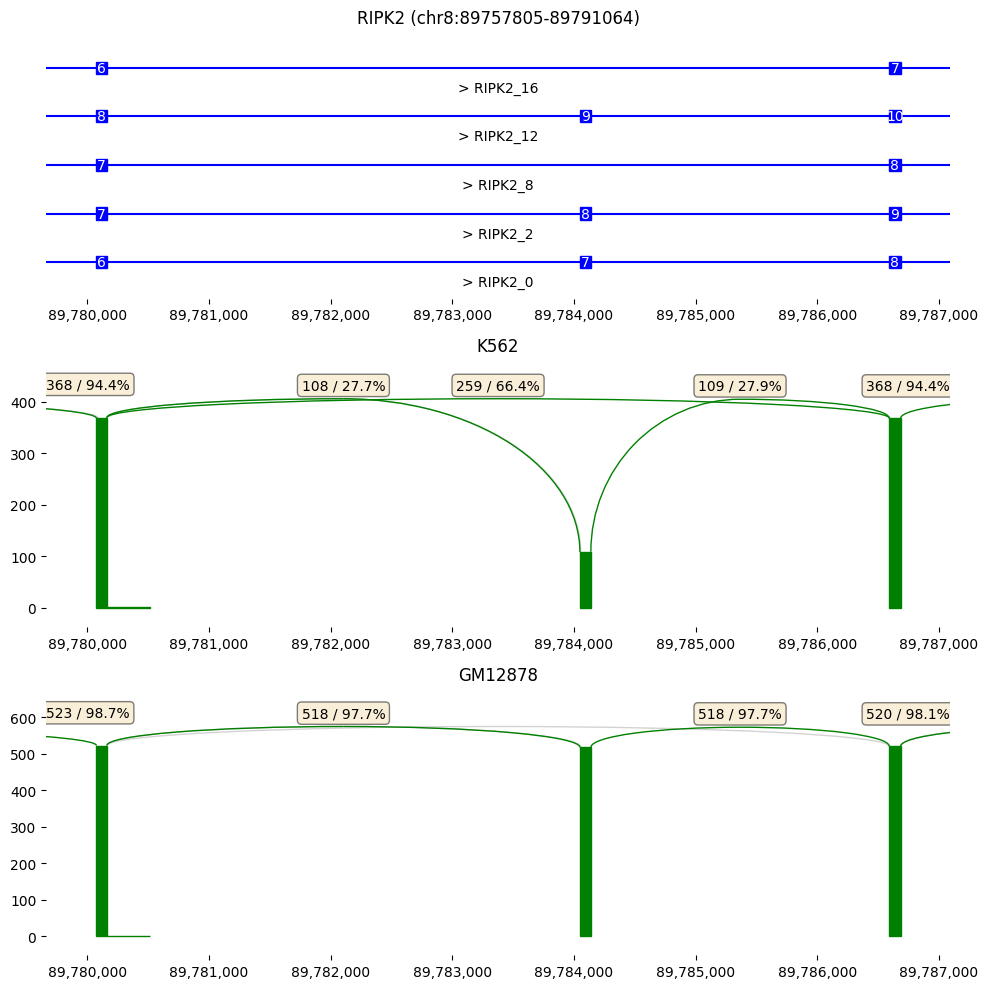

In [5]:
plt.rcParams["figure.figsize"] = (10,10)
pos=[89780160-500,89786592+500]
fig,axs=plt.subplots(3)
g=isoseq['RIPK2']
g.gene_track(x_range=pos, 
             ax=axs[0], 
             reference=False, 
             select_transcripts=g.filter_transcripts('SUBSTANTIAL'))
g.sashimi_plot(samples=isoseq.groups()['K562'],
               x_range=pos, ax=axs[1], 
               title='K562', 
               log_y=False)
g.sashimi_plot(samples=isoseq.groups()['GM12878'],
               x_range=pos, 
               ax=axs[2], 
               title='GM12878', 
               log_y=False)

fig.tight_layout()



## Splicing coordination
A particular strength of long read sequencing is the fact that distal splicing events on the same gene are covered by the same read, facilitating analysis of splicing coordination. Isotools implements a pairwise independence test for all pairs of Alternative Splicing Events (ASEs) of a gene with the [coordination_test](../isotoolsAPI.html?highlight=coordination_test#isotools.Transcriptome.coordination_test) method.

In [6]:
coordination_results=isoseq.coordination_test().sort_values('padj')
coordination_results.head()

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████| 10803/10803 [00:03<00:00, 3299.07genes/s]


,gene_id,gene_name,strand,eventA_type,eventB_type,eventA_start,evemtA_end,eventB_start,eventB_end,pvalue,padj,stat,log2OR,dcPSI_AB,dcPSI_BA,priA_priB,priA_altB,altA_priB,altA_altB,priA_priB_trID,priA_altB_trID,altA_priB_trID,altA_altB_trID
50,ENSG00000147813.16,NAPRT,-,IR,IR,143575093,143575190,143574900,143574985,8.463000e-78,1.040949e-75,92.901587,6.537631,0.523041,0.640535,472,45,14,124,"[0, 5, 6, 7, 54, 62, 73, 17, 100, 24, 30, 46, ...","[25, 48, 129, 68, 128, 33, 133, 101, 135, 141,...","[41, 96, 110, 112, 115]","[21, 1, 12, 31, 71, 44, 51, 63, 78, 92, 132, 1..."
104,ENSG00000182325.11,FBXL6,-,IR,IR,144357786,144358031,144357121,144357438,1.074270e-67,6.606760e-66,400.642857,8.646173,0.409171,0.434428,142,14,4,158,"[1, 21, 34, 7, 32, 36, 38, 72, 45, 81, 51, 85,...","[0, 29, 35, 71, 87, 89]","[4, 40]","[2, 9, 19, 31, 41, 14, 24, 44, 48, 56, 11, 54,..."
41,ENSG00000160957.15,RECQL4,-,IR,IR,144512771,144512846,144512324,144512391,7.923559e-53,3.248659e-51,15.489791,3.953246,0.381897,0.428869,1231,104,81,106,"[22, 31, 6, 20, 114, 147, 124, 11, 38, 72, 13,...","[2, 401, 191, 221, 94, 364, 68, 204, 250, 127,...","[117, 136, 279, 259, 271, 532, 292, 49, 184, 2...","[146, 21, 0, 107, 104, 408, 110, 112, 28, 29, ..."
54,ENSG00000167700.9,MFSD3,+,IR,IR,144510015,144510359,144510507,144510597,4.299909e-32,1.322222e-30,inf,38.459595,0.503866,0.743802,180,20,0,42,"[0, 3, 23, 35, 5, 38, 39]","[2, 21, 19, 20, 29]",[],"[11, 26, 14, 36, 18]"
105,ENSG00000182325.11,FBXL6,-,IR,IR,144357786,144358031,144356915,144356989,4.137357e-28,1.017790e-26,51.721154,5.692683,0.211262,0.420453,163,104,3,99,"[1, 12, 21, 34, 4, 7, 75, 86, 15, 23, 25, 26, ...","[2, 3, 41, 0, 24, 29, 44, 48, 49, 8, 17, 37, 6...","[32, 53]","[9, 19, 31, 14, 56, 11, 13, 54, 42, 59, 63, 64..."


## Differential Isoform Expression
In addition to the differential splicing test, isotools also implements the differential isoform expression (DIE) test ([die_test](../isotoolsAPI.html?highlight=die_test#isotools.Transcriptome.die_test) method), as proposed by [Joglekar *et al.*, 2021](https://www.nature.com/articles/s41467-020-20343-5).
This test performs a $\chi^2$ test on the coverage table, to find genes where relative isoform expression is different between samples. 


In [7]:
isoseq.die_test(groups=isoseq.groups()).sort_values('pvalue').head(10)

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████| 10803/10803 [00:00<00:00, 17589.42genes/s]


,gene_id,gene_name,chrom,strand,start,end,padj,pvalue,deltaPI,transcript_ids
5982,ENSG00000070756.17,PABPC1,chr8,-,100685815,100722809,0.000000e+00,0.000000e+00,-0.289084,"[2, 1]"
5094,ENSG00000156482.11,RPL30,chr8,-,98024850,98046469,0.000000e+00,0.000000e+00,0.515042,"[3, 2]"
4805,ENSG00000161016.18,RPL8,chr8,-,144789764,144792587,0.000000e+00,0.000000e+00,-0.477042,"[2, 6]"
4632,ENSG00000164924.18,YWHAZ,chr8,-,100916522,100953388,0.000000e+00,0.000000e+00,0.303116,"[31, 11]"
4172,ENSG00000147604.14,RPL7,chr8,-,73290241,73295789,1.157393e-170,1.885004e-172,0.092221,"[2, 31]"
3235,ENSG00000104408.11,EIF3E,chr8,-,108162786,108443496,2.092139e-137,4.088872e-139,0.166874,"[0, 20]"
9988,ENSG00000104312.8,RIPK2,chr8,+,89757805,89791064,6.088181e-101,1.388185e-102,0.677697,"[2, 0]"
4239,ENSG00000129696.13,TTI2,chr8,-,33473385,33513185,9.366700e-100,2.440834e-101,-0.617118,"[3, 22]"
1369,ENSG00000147684.10,NDUFB9,chr8,+,124539100,124580648,4.019587e-89,1.178381e-90,0.399575,"[0, -1]"
1525,ENSG00000104320.15,NBN,chr8,-,89924514,90003228,5.103980e-88,1.662534e-89,-0.409024,"[2, 1]"
